In [61]:
from os import listdir
from os.path import isfile, join
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

### Data - Restaurant Week 2018  (https://www.kaggle.com/popoandrew/restaurant-week-2018)

In [13]:
rstw_2018 = pd.read_csv('data/rstw_2018.csv')

# remove 57, 338 since they are not in yelp database
rstw_2018.drop(57, inplace=True)
rstw_2018.drop(338, inplace=True)
rstw_2018 = rstw_2018.reset_index(drop=True)

display(rstw_2018)

,name,street_address,google_map,review_count,phone,website,restaurant_type,average_review,food_review,service_review,...,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,latitude,longitude,postal_code
0,Smoke Jazz and Supper Club,"2751 Broadway New York, NY 10025",//www.google.com/maps/search/?api=1&query=40.8...,2155,(212) 864-6662,http://www.smokejazz.com/,Contemporary American,4.421550,3.9,4.2,...,2,7,5,24,62,Smoke has augmented its reputation as one of M...,Contemporary American,40.801126,-73.968192,10025.0
1,Tavern on the Green,"1 Tavern on the Green New York, NY 10023",//www.google.com/maps/search/?api=1&query=40.7...,7029,(212) 877-8684,http://www.tavernonthegreen.com/,American,4.670290,4.4,4.4,...,1,2,6,19,72,Magical is a word thrown around a lot when dis...,American,40.772187,-73.977722,10023.0
2,ABC Kitchen,"35 East 18th Street New York, NY 10003",//www.google.com/maps/search/?api=1&query=40.7...,6031,(212) 475-5829,http://www.abckitchennyc.com/,Contemporary American,4.760310,4.6,4.4,...,1,2,5,15,77,ABC Kitchen with Jean-Georges: passionately co...,Contemporary American,40.737897,-73.989499,10003.0
3,Catch New York,"21 Ninth Avenue New York, NY 10014",//www.google.com/maps/search/?api=1&query=40.7...,4830,(212) 392-5978,http://www.catchhg.com/,Seafood,4.548300,4.6,4.2,...,3,2,6,15,74,CATCH features contemporary renditions of clas...,Seafood,40.740227,-74.006340,10014.0
4,Becco,"355 West 46th Street New York, NY 10010",//www.google.com/maps/search/?api=1&query=40.7...,18139,(212) 397-7597,http://www.becco-nyc.com/,Italian,4.418139,4.4,4.4,...,1,3,9,27,60,Lidia Bastianich & her son Joe's Theater Distr...,Italian,40.760804,-73.989832,10010.0
5,Estiatorio Milos - NY,"125 West 55th Street New York, NY 10019",//www.google.com/maps/search/?api=1&query=40.7...,4404,(212) 245-7400,http://www.estiatoriomilos.com/,Seafood,4.844040,4.8,4.6,...,1,1,3,14,81,"The freshest, most flavorful fish, vegetables ...",Seafood,40.763598,-73.978951,10019.0
6,Tao Uptown,"42 East 58th Street New York, NY 10022",//www.google.com/maps/search/?api=1&query=40.7...,10600,(212) 888-2288,http://www.taorestaurant.com/,Asian,4.610600,4.5,4.4,...,1,2,7,21,69,"A 16-foot Buddha, which floats above a reflect...",Asian,40.762607,-73.971478,10022.0
7,Red Rooster Harlem,"310 Lenox Avenue New York, NY 10027",//www.google.com/maps/search/?api=1&query=40.8...,5682,(212) 792-9001,http://redroosterharlem.com/,Southern,4.456820,4.4,4.2,...,2,3,10,24,61,"Located in the heart of Harlem, Red Rooster se...",Other,40.808057,-73.944914,10027.0
8,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",//www.google.com/maps/search/?api=1&query=40.7...,7225,(212) 575-5129,http://delfriscos.com/,Steakhouse,4.772250,4.6,4.7,...,1,2,5,16,76,A midtown classic with sprawling views of the ...,Steakhouse,40.759425,-73.982222,10020.0
9,FIG & OLIVE Fifth Avenue,"10 East 52nd Street New York, NY 10021",//www.google.com/maps/search/?api=1&query=40.7...,7186,(212) 319-2002,http://www.figandolive.com/,Mediterranean,4.571860,4.5,4.3,...,1,3,7,25,64,FIG & OLIVE is about passion for the best oliv...,Mediterranean,40.759280,-73.975634,10021.0


### Yelp Data - download from Yelp API

In [14]:
yelp_rsts = pd.read_csv("data/yelp_rst_2019.csv")
display(yelp_rsts)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,smoke-jazz-and-supper-club-new-york-2,"[{'alias': 'jazzandblues', 'title': 'Jazz & Bl...","{'latitude': 40.8012384, 'longitude': -73.9681...",(212) 864-6662,5.912356,trbr9pYDDmXCj9z8m2d6LQ,https://s3-media2.fl.yelpcdn.com/bphoto/mtoknH...,False,"{'address1': '2751 Broadway', 'address2': None...",Smoke Jazz & Supper Club,1.212865e+10,$$,4.0,352,"['pickup', 'delivery']",https://www.yelp.com/biz/smoke-jazz-and-supper...
1,tavern-on-the-green-new-york-7,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.772194, 'longitude': -73.9776}",(212) 877-8684,20.401585,hKdvsbuQRtjajWYwjaoOQw,https://s3-media1.fl.yelpcdn.com/bphoto/fBgjO7...,False,"{'address1': '67 Central Park W', 'address2': ...",Tavern on the Green,1.212878e+10,$$$,3.5,1240,[],https://www.yelp.com/biz/tavern-on-the-green-n...
2,abc-kitchen-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.738085, 'longitude': -73.989472}",(212) 475-5829,39.424873,dMhRafXdr765DHe0k-QfaQ,https://s3-media2.fl.yelpcdn.com/bphoto/k2V0Qy...,False,"{'address1': '35 E 18th St', 'address2': '', '...",ABC Kitchen,1.212476e+10,$$$,4.0,2866,[],https://www.yelp.com/biz/abc-kitchen-new-york?...
3,catch-new-york-new-york,"[{'alias': 'advertising', 'title': 'Advertisin...","{'latitude': 40.74681, 'longitude': -73.98442}",(212) 715-8700,1994.761480,7mB_COyhOY1k01JcOu-wTw,https://s3-media4.fl.yelpcdn.com/bphoto/q1THJC...,False,"{'address1': '15 E 32nd St', 'address2': '4th ...",Catch -New York,1.212716e+10,NaN,3.5,37,[],https://www.yelp.com/biz/catch-new-york-new-yo...
4,becco-new-york-4,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.76083, 'longitude': -73.98981}",(212) 397-7597,3.072498,QObHX0yR6zd0WfksRDbJTA,https://s3-media3.fl.yelpcdn.com/bphoto/w5_bcc...,False,"{'address1': '355 W 46th St', 'address2': '', ...",Becco,1.212398e+10,$$$,3.5,2680,[],https://www.yelp.com/biz/becco-new-york-4?adju...
5,estiatorio-milos-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.76368, 'longitude': -73.97922}",(212) 245-7400,21.007385,mhhTORjUdXj-UIDjyGmhBg,https://s3-media1.fl.yelpcdn.com/bphoto/MHD33q...,False,"{'address1': '125 W 55th St', 'address2': '', ...",Estiatorio Milos,1.212246e+10,$$$$,4.0,836,[],https://www.yelp.com/biz/estiatorio-milos-new-...
6,tao-uptown-new-york,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 40.76269, 'longitude': -73.97147}",(212) 888-2288,1.660646,TU_BU9HLflYI2xlyqVQdRA,https://s3-media4.fl.yelpcdn.com/bphoto/Hlkr0I...,False,"{'address1': '42 E 58th St', 'address2': '', '...",TAO Uptown,1.212888e+10,$$$,3.5,2462,"['pickup', 'delivery']",https://www.yelp.com/biz/tao-uptown-new-york?a...
7,red-rooster-harlem-new-york-3,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 40.80815, 'longitude': -73.94488}",(212) 792-9001,6.188861,fxGpXRxFUDzlU3Cyszu4uQ,https://s3-media3.fl.yelpcdn.com/bphoto/S_4wwM...,False,"{'address1': '310 Lenox Ave', 'address2': '', ...",Red Rooster Harlem,1.212793e+10,$$$,3.5,2952,[],https://www.yelp.com/biz/red-rooster-harlem-ne...
8,del-friscos-double-eagle-steakhouse-new-york,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...","{'latitude': 40.759412, 'longitude': -73.982221}",(212) 575-5129,8.690020,b8a-8u_A51v2IzyjLVsx6w,https://s3-media3.fl.yelpcdn.com/bphoto/FyQ0V-...,False,"{'address1': '1221 Ave Of The Americas', 'addr...",Del Frisco's Double Eagle Steakhouse,1.212576e+10,$$$$,4.5,2763,[],https://www.yelp.com/biz/del-friscos-double-ea...
9,fig-and-olive-fifth-ave-new-york-4,"[{'alias': 'mediterranean', 'title': 'Mediterr...","{'latitude': 40.7594108995958, 'longitude': -7...",(212) 319-2002,21.674110,FON3TceJNsTC0I0mzBwOKg,https://s3-media1.fl.yelpcdn.com/bphoto/ZE51Xe...,False,"{'address1': '10 E 52nd St', 'address2': '', '...",Fig & Olive Fifth Ave,1.212319e+10,$$$,3.5,1103,"['delivery', 'pickup

### Restaurant Reviews  - Scrape from Yelp website

In [15]:
dir_path = "data/reviews"
review_files = [f for f in listdir(dir_path) if f.endswith('.csv') and isfile(join(dir_path, f))]


rst_week_start = datetime.date(2018, 7, 23)
rst_week_end = datetime.date(2018, 8, 17)

results = pd.DataFrame(data=[], columns=['alias', 'cur_rating', 'review_count', 'avg_rating', 'rating_1s', 'rating_2s', 'rating_3s', 'rating_4s', 'rating_5s', 
                                         'rw_review_count', 'rw_avg_rating', 'rw_rating_1s', 'rw_rating_2s', 'rw_rating_3s', 'rw_rating_4s', 'rw_rating_5s'])
for f in review_files:
    print(f)
    idx = int(f.split('_')[0])
    reviews = pd.read_csv(join(dir_path, f))
    reviews['time_created'] = pd.to_datetime(reviews['time_created'])

    row = []
    row.append(yelp_rsts.loc[idx]['alias'])
    row.append(yelp_rsts.loc[idx]['rating'])
    row.append(reviews.shape[0])
    row.append(round(reviews['rating'].mean(), 2))
    for i in range(1, 6):
        row.append(reviews[reviews['rating'] == i].shape[0])
    
    rw_reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
    row.append(rw_reviews['rating'].shape[0])
    row.append(round(rw_reviews['rating'].mean(), 2))
    for i in range(1, 6):
        row.append(rw_reviews[rw_reviews['rating'] == i].shape[0])
        
    results.loc[idx] = pd.Series(row, index=results.columns)

display(results)
results.to_csv("data/review_analysis.csv")

000_smoke_jazz_and_supper_club_new_york_2.csv
001_tavern_on_the_green_new_york_7.csv


/Users/ctc316/Desktop/NYC_Rst_Week/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


002_abc_kitchen_new_york.csv
003_catch_new_york_new_york.csv
004_becco_new_york_4.csv
005_estiatorio_milos_new_york.csv
006_tao_uptown_new_york.csv
007_red_rooster_harlem_new_york_3.csv
008_del_friscos_double_eagle_steakhouse_new_york.csv
009_fig_and_olive_fifth_ave_new_york_4.csv
010_rosa_mexicano_new_york_6.csv
011_abc_cocina_new_york.csv
012_gallaghers_steakhouse_new_york.csv
013_boulud_sud_new_york.csv
014_nougatine_at_jean_georges_new_york_3.csv
015_sarabeths_new_york_10.csv
016_tao_downtown_new_york_2.csv
017_ilili_new_york_2.csv
018_scarpetta_new_york.csv
019_atlantic_grill_new_york_3.csv
020_empellón_new_york_3.csv
021_ocean_prime_new_york.csv
022_sarabeths_west_new_york.csv
024_toloache_50_new_york.csv
025_blue_fin_new_york.csv
026_bar_boulud_new_york_2.csv
027_hakkasan_new_york.csv
028_lincoln_ristorante_new_york.csv
029_cafe_boulud_new_york_4.csv
030_the_view_restaurant_and_lounge_new_york.csv
031_park_avenue_autumn_winter_spring_summer_new_york_3.csv
032_zuma_new_york_2.cs

244_darbar_grill_new_york.csv
245_the_gin_parlour_new_york.csv
246_michael_jordans_the_steak_house_nyc_new_york_2.csv
247_beauty_and_essex_new_york.csv
248_the_mercer_kitchen_new_york_6.csv
249_the_dutch_new_york.csv
250_lafayette_new_york_2.csv
251_vandal_new_york.csv
252_gotham_bar_and_grill_new_york.csv
253_il_buco_alimentari_and_vineria_new_york_2.csv
254_bar_primi_new_york_3.csv
255_lure_fishbar_new_york_2.csv
256_nix_new_york.csv
257_lupa_new_york.csv
258_claudette_new_york.csv
259_empellón_taqueria_new_york.csv
260_perry_st_new_york.csv
261_boucherie_west_village_new_york_3.csv
262_indochine_new_york.csv
263_el_vez_new_york.csv
264_public_kitchen_new_york_2.csv
265_tamarind_new_york_4.csv
266_the_stanton_social_new_york.csv
267_hearth_new_york.csv
268_sarabeths_tribeca_new_york.csv
269_leuca_brooklyn.csv
270_sant_ambroeus_new_york_4.csv
271_il_cantinori_new_york.csv
272_mr_chow_new_york.csv
273_narcissa_new_york.csv
274_il_mulino_new_york_downtown_new_york_2.csv
275_sant_ambroe

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7
6,tao-uptown-new-york,3.5,2449,3.55,219,267,521,822,620,12,3.67,2,0,2,4,4
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29
9,fig-and-olive-fifth-ave-new-york-4,3.5,1098,3.57,89,124,203,432,250,13,3.77,0,2,4,2,5


In [26]:
analysis = pd.read_csv("data/review_analysis.csv", index_col=0)
display(analysis)

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7
6,tao-uptown-new-york,3.5,2449,3.55,219,267,521,822,620,12,3.67,2,0,2,4,4
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29
9,fig-and-olive-fifth-ave-new-york-4,3.5,1098,3.57,89,124,203,432,250,13,3.77,0,2,4,2,5


### Profiling Restaurant Week 2018 Summer

#### price

['\\$31 to \\$50', '\\$30 and under', '\\$50 and over']
[229, 53, 64]
[0.661849710982659, 0.1531791907514451, 0.18497109826589594]


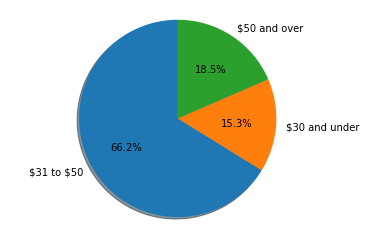

In [48]:
items = rstw_2018['price_range'].unique()
prices = []
ratios = []
counts = []
for item in items:
    prices.append(item.replace('$', '\$'))
    counts.append(rstw_2018[rstw_2018['price_range'] == item].shape[0])
    ratios.append(counts[-1] / rstw_2018.shape[0])

print(prices)
print(counts)
print(ratios)

fig, ax = plt.subplots()
ax.pie(ratios, labels=prices, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [70]:
items = yelp_rsts['price'].unique()
describe(yelp_rsts['price'])
prices = []
ratios = []
counts = []
for item in items:
    print(item)
    if item is np.nan:
        prices.append('N/A')
    else:
        prices.append(item.replace('$', '\$'))
    counts.append(rstw_2018[rstw_2018['price_range'] == item].shape[0])
    ratios.append(counts[-1] / rstw_2018.shape[0])

print(prices)
print(counts)
print(ratios)

fig, ax = plt.subplots()
ax.pie(ratios, labels=prices, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

NameError: name 'describe' is not defined

#### No review on rst week

In [19]:
no_reviews = analysis[analysis['rw_review_count'] == 0]
print(no_reviews.shape[0])
display(no_reviews)

18


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
141,etcetera-etcetera-new-york,4.0,406,3.97,17,30,63,136,160,0,NaN,0,0,0,0,0
142,cafe-centro-new-york-8,3.5,149,3.47,7,24,40,48,30,0,NaN,0,0,0,0,0
165,cipriani-new-york-2,3.5,99,3.56,15,8,14,31,31,0,NaN,0,0,0,0,0
174,delmonicos-kitchen-new-york-3,3.5,321,3.49,33,49,63,81,95,0,NaN,0,0,0,0,0
184,tarallucci-e-vino-upper-west-side-new-york,3.5,111,3.67,10,9,25,31,36,0,NaN,0,0,0,0,0
203,nick-and-stefs-steakhouse-new-york,3.5,204,3.45,21,26,48,58,51,0,NaN,0,0,0,0,0
212,haru-sushi-new-york-18,3.5,73,3.27,14,9,12,19,19,0,NaN,0,0,0,0,0
237,triomphe-new-york-2,3.5,132,3.60,10,17,24,46,35,0,NaN,0,0,0,0,0
242,the-morgan-dining-room-new-york,4.0,23,3.83,0,3,3,12,5,0,NaN,0,0,0,0,0
243,montebello-ristorante-italiano-new-york,3.5,83,3.33,11,10,17,31,14,0,NaN,0,0,0,0,0


In [27]:
better = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.25)]
print(better.shape[0])
display(better)

113


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17
10,rosa-mexicano-new-york-6,3.5,1111,3.59,90,122,229,382,288,14,4.07,0,1,4,2,7
13,boulud-sud-new-york,4.0,682,3.90,30,54,108,254,236,7,4.57,0,0,0,3,4
19,atlantic-grill-new-york-3,3.5,546,3.74,33,50,95,218,150,1,4.00,0,0,0,1,0
25,blue-fin-new-york,3.5,944,3.54,70,104,214,359,197,7,3.86,0,1,1,3,2
27,hakkasan-new-york,3.5,846,3.74,60,84,162,247,293,8,4.00,0,1,2,1,4
28,lincoln-ristorante-new-york,4.0,541,3.81,54,44,65,165,213,6,4.33,0,0,1,2,3


In [28]:
worse = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] <= -0.25)]
print(worse.shape[0])
display(worse)

99


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0
12,gallaghers-steakhouse-new-york,4.0,970,4.13,46,66,114,236,508,20,3.55,3,4,2,1,10
14,nougatine-at-jean-georges-new-york-3,4.0,1061,3.86,71,88,163,332,407,9,3.44,2,0,2,2,3
16,tao-downtown-new-york-2,3.5,1250,3.61,158,129,172,372,419,24,2.96,8,2,3,5,6
35,calle-ocho-new-york,4.0,2458,3.94,99,165,374,969,851,19,3.58,1,3,4,6,5
37,lavo-new-york-4,3.5,965,3.25,197,96,168,274,230,8,2.38,3,1,3,0,1
40,ristorante-morini-new-york,4.0,262,3.87,26,20,32,67,117,2,3.50,0,0,1,1,0
41,morimoto-new-york,4.0,2921,4.06,104,188,433,914,1282,38,3.79,3,2,9,10,14


In [22]:
cusine, price, location?

Object `location` not found.


In [ ]:
cusine, price, location

NameError: name 'cusine' is not defined